In [1]:
#import standard libraries
import pandas as pd
pd.set_option("display.max_rows",100)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#import Regression libraries
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.corr() # we can see that the most correlation is inbetween TV and Sales (also in heatmap down below)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [6]:
df.shape

(200, 4)

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

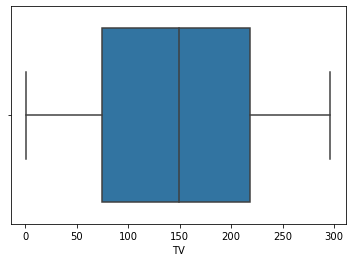

In [8]:
sns.boxplot(x=df["TV"]);

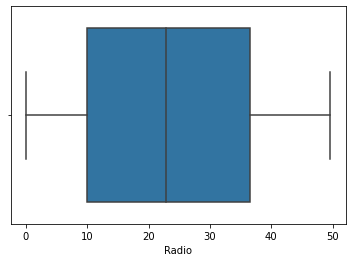

In [9]:
sns.boxplot(x=df["Radio"]);

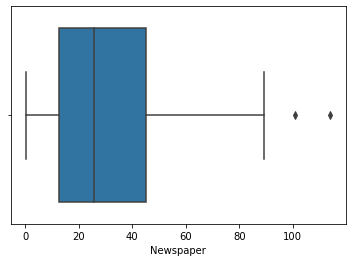

In [10]:
sns.boxplot(x=df["Newspaper"]);

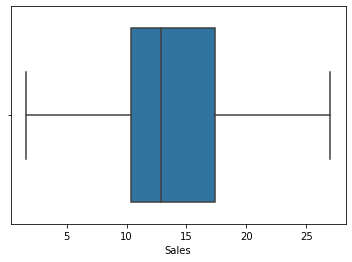

In [11]:
sns.boxplot(x=df["Sales"]);

In [12]:
abs(df.corr()["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

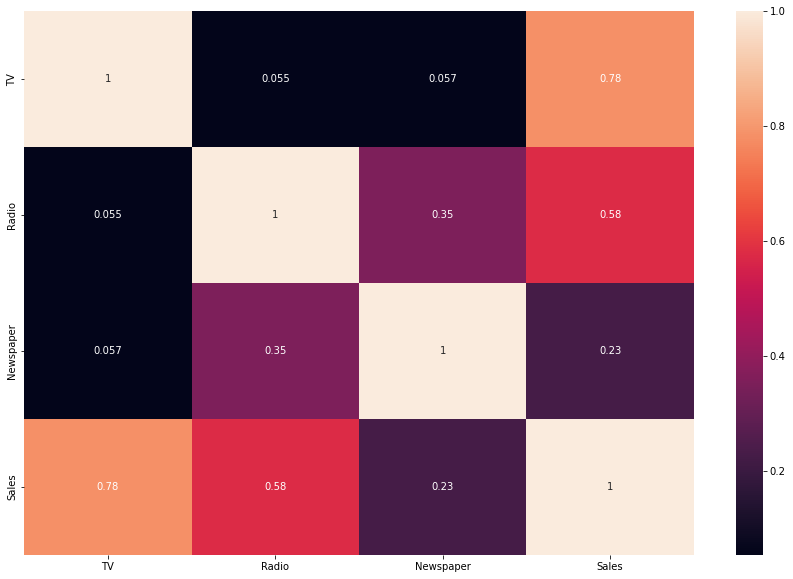

In [13]:
ax = plt.subplots(figsize = (15,10))
sns.heatmap(df.corr(),annot = True);

### Data Visualization (veri görselleştirme)

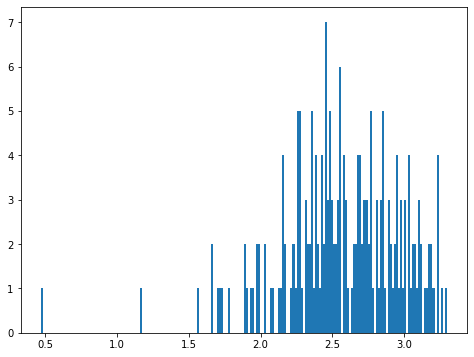

In [14]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df.Sales)), bins=200);

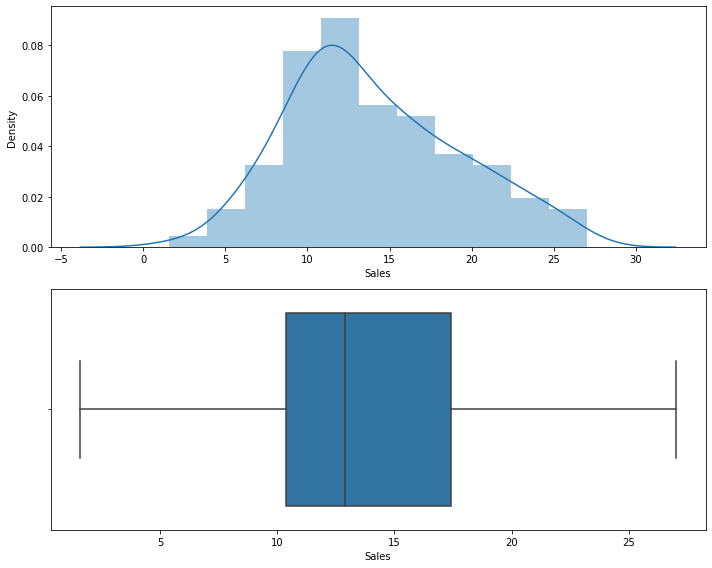

In [15]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(2,1,1)
sns.distplot(df['Sales'])
fig.add_subplot(2,1,2)
sns.boxplot(df['Sales'])
plt.tight_layout();

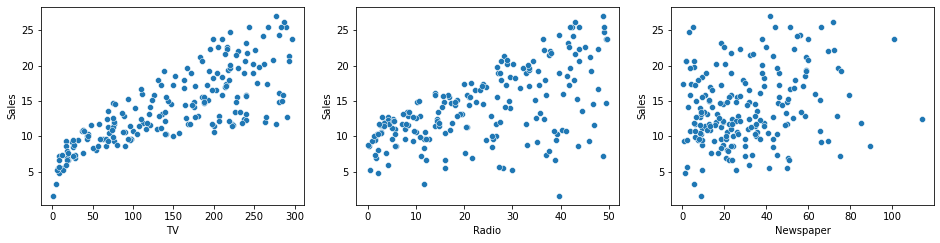

In [16]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,3,1)
sns.scatterplot(df['TV'], df['Sales'])
fig.add_subplot(2,3,2)
sns.scatterplot(df['Radio'],df['Sales'])
fig.add_subplot(2,3,3)
sns.scatterplot(df['Newspaper'],df['Sales']);

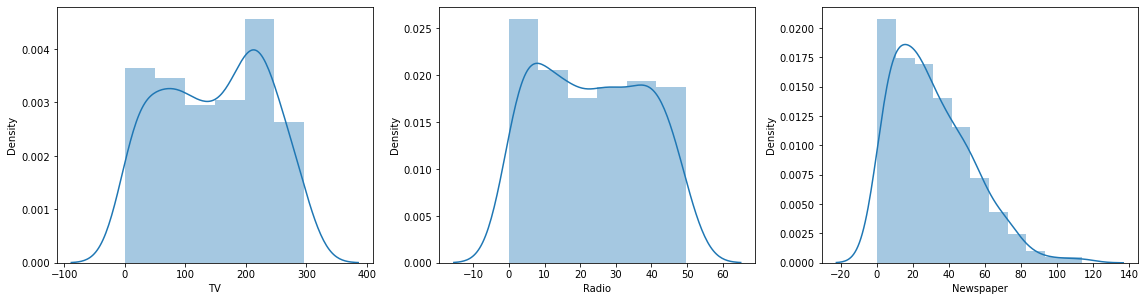

In [17]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,3,1)
sns.distplot(df['TV'])
fig.add_subplot(2,3,2)
sns.distplot(df['Radio'])
fig.add_subplot(2,3,3)
sns.distplot(df['Newspaper'])
plt.tight_layout()

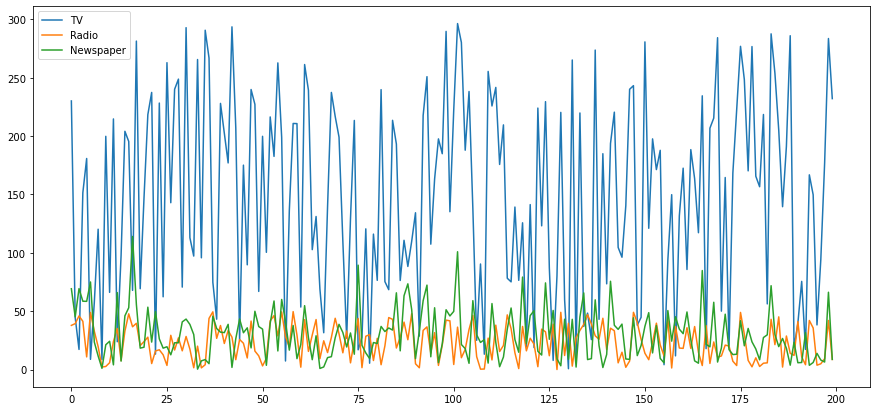

In [18]:
fig = plt.figure(figsize=(15,7))
df.TV.plot(), df.Radio.plot(), df.Newspaper.plot()
plt.legend();

<AxesSubplot:>

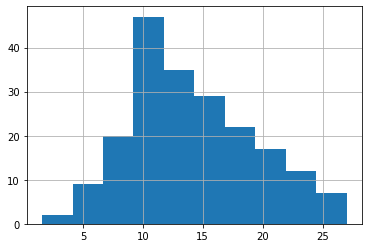

In [19]:
df.Sales.hist()

In [20]:
x=df[["TV","Radio","Newspaper"]]
y=df[["Sales"]]

In [21]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [23]:
#Regression Function - Tests all Regression models and sorts them for their highest R-Squared Value
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [24]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.979806,0.780950,0.610524
XGradientBooting,0.968355,0.977603,0.773307
Extra Tree,0.964736,1.031988,0.760000
Linear,0.930859,1.445033,1.180093
Ridge,0.930858,1.445044,1.180097
ElasticNet,0.930518,1.448591,1.179088
Lasso,0.930026,1.453710,1.182754


In [25]:
x1=df[['TV']]
y1=df[['Sales']]

In [26]:
algo_test(x1,y1)

,R_Squared,RMSE,MAE
Linear,0.640600,3.294569,2.705212
Ridge,0.640600,3.294570,2.705212
ElasticNet,0.640395,3.295509,2.706792
Lasso,0.640206,3.296375,2.708232
Gradient Boosting,0.415522,4.201400,3.345918
XGradientBooting,0.261452,4.722796,3.783800
Extra Tree,0.061923,5.322664,4.397500


In [27]:
x2=df[['Newspaper']]
y2=df[['Sales']]

In [28]:
algo_test(x2,y2)

,R_Squared,RMSE,MAE
Linear,0.121219,5.151695,4.266492
Ridge,0.121217,5.151699,4.266498
ElasticNet,0.117695,5.162013,4.279423
Lasso,0.114350,5.171790,4.291467
Gradient Boosting,-0.276344,6.208599,5.071205
XGradientBooting,-0.776159,7.324040,5.972685
Extra Tree,-0.838730,7.451929,6.045000


In [29]:
x3=df[['Radio']]
y3=df[['Sales']]

In [30]:
algo_test(x3,y3)

,R_Squared,RMSE,MAE
Linear,0.441934,4.105372,3.150815
Ridge,0.441928,4.105394,3.150825
ElasticNet,0.438937,4.116380,3.155701
Lasso,0.436814,4.124162,3.159065
Gradient Boosting,0.323084,4.521444,3.346180
XGradientBooting,0.237754,4.797967,3.687802
Extra Tree,0.223450,4.842777,3.773333


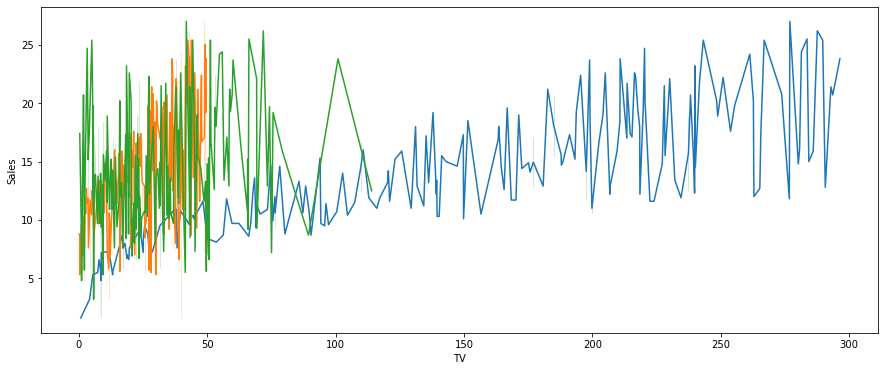

In [31]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(x['TV'],y['Sales']); # blue line
sns.lineplot(x['Radio'],y['Sales']); # orange line
sns.lineplot(x['Newspaper'],y['Sales']); # green line

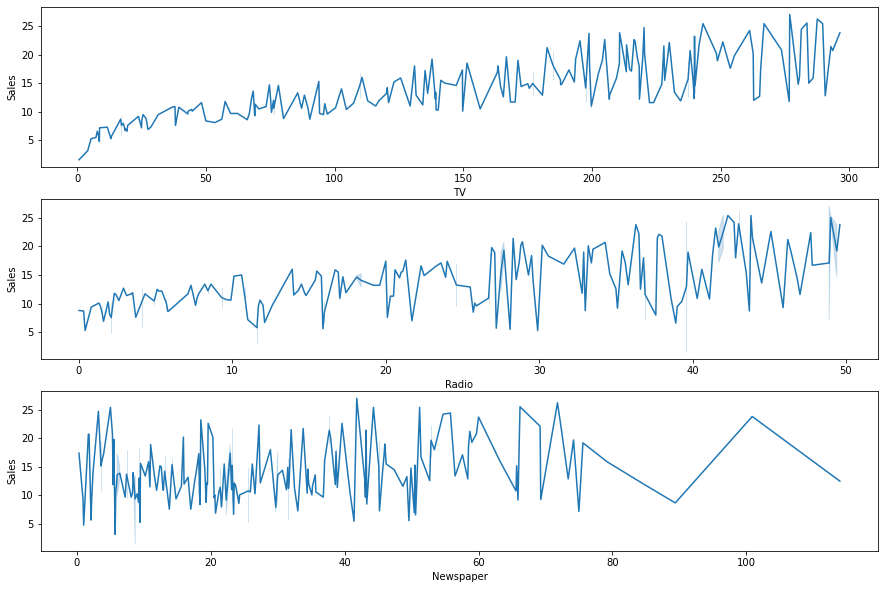

In [32]:
fig = plt.figure(figsize=(15,10))
fig.add_subplot(3,1,1)
sns.lineplot(x1['TV'], y1['Sales'])
fig.add_subplot(3,1,2)
sns.lineplot(x3['Radio'],y3['Sales'])
fig.add_subplot(3,1,3)
sns.lineplot(x2['Newspaper'],y2['Sales']);

### try wih deep learning

In [33]:
#pip install keras

In [34]:
#pip install tensorflow

In [35]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [36]:
x=df[["TV","Radio","Newspaper"]]
y=df[["Sales"]]

In [37]:
x=pd.get_dummies(x,drop_first=True)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160, 1), (40, 1))

In [40]:
model = Sequential()
model.add(Dense(150,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [41]:
model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test),batch_size=128,epochs=500)
model.summary()

Epoch 1/500
2/2 [==============================] - 1s 131ms/step - loss: 207.2184 - val_loss: 14.3269
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 20.8197 - val_loss: 28.8288
Epoch 3/500
2/2 [==============================] - 0s 16ms/step - loss: 30.2642 - val_loss: 11.3945
Epoch 4/500
2/2 [==============================] - 0s 16ms/step - loss: 11.4734 - val_loss: 20.1622
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 18.1816 - val_loss: 9.9039
Epoch 6/500
2/2 [==============================] - 0s 16ms/step - loss: 7.6894 - val_loss: 12.8985
Epoch 7/500
2/2 [==============================] - 0s 16ms/step - loss: 9.7970 - val_loss: 8.5492
Epoch 8/500
2/2 [==============================] - 0s 16ms/step - loss: 6.1468 - val_loss: 7.2023
Epoch 9/500
2/2 [==============================] - 0s 16ms/step - loss: 5.6018 - val_loss: 6.4606
Epoch 10/500
2/2 [==============================] - 0s 16ms/step - loss: 4.6438 - val_loss: 5.6239
Epoch 1

Epoch 84/500
2/2 [==============================] - 0s 16ms/step - loss: 1.4750 - val_loss: 3.6676
Epoch 85/500
2/2 [==============================] - 0s 16ms/step - loss: 1.5257 - val_loss: 3.8478
Epoch 86/500
2/2 [==============================] - 0s 16ms/step - loss: 1.4809 - val_loss: 4.0741
Epoch 87/500
2/2 [==============================] - 0s 16ms/step - loss: 1.4593 - val_loss: 3.9080
Epoch 88/500
2/2 [==============================] - 0s 19ms/step - loss: 1.5654 - val_loss: 4.1374
Epoch 89/500
2/2 [==============================] - 0s 13ms/step - loss: 1.4080 - val_loss: 4.0802
Epoch 90/500
2/2 [==============================] - 0s 16ms/step - loss: 1.3892 - val_loss: 3.7788
Epoch 91/500
2/2 [==============================] - 0s 16ms/step - loss: 1.4456 - val_loss: 3.9840
Epoch 92/500
2/2 [==============================] - 0s 16ms/step - loss: 1.3551 - val_loss: 4.1106
Epoch 93/500
2/2 [==============================] - 0s 16ms/step - loss: 1.3444 - val_loss: 3.8769
Epoch 94/5

2/2 [==============================] - 0s 16ms/step - loss: 0.5851 - val_loss: 2.5665
Epoch 167/500
2/2 [==============================] - 0s 16ms/step - loss: 0.5614 - val_loss: 2.6453
Epoch 168/500
2/2 [==============================] - 0s 16ms/step - loss: 0.5723 - val_loss: 2.1728
Epoch 169/500
2/2 [==============================] - 0s 16ms/step - loss: 0.8155 - val_loss: 2.3146
Epoch 170/500
2/2 [==============================] - 0s 10ms/step - loss: 0.9129 - val_loss: 3.2358
Epoch 171/500
2/2 [==============================] - 0s 16ms/step - loss: 1.2799 - val_loss: 3.5812
Epoch 172/500
2/2 [==============================] - 0s 16ms/step - loss: 2.6238 - val_loss: 4.0542
Epoch 173/500
2/2 [==============================] - 0s 20ms/step - loss: 1.7386 - val_loss: 3.0878
Epoch 174/500
2/2 [==============================] - 0s 12ms/step - loss: 2.1058 - val_loss: 4.1832
Epoch 175/500
2/2 [==============================] - 0s 16ms/step - loss: 1.9793 - val_loss: 2.9426
Epoch 176/500


2/2 [==============================] - 0s 16ms/step - loss: 0.8432 - val_loss: 1.2490
Epoch 249/500
2/2 [==============================] - 0s 0s/step - loss: 0.5505 - val_loss: 1.0747
Epoch 250/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4251 - val_loss: 1.0221
Epoch 251/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4198 - val_loss: 1.0823
Epoch 252/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3895 - val_loss: 1.1281
Epoch 253/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3708 - val_loss: 1.2007
Epoch 254/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3826 - val_loss: 1.2309
Epoch 255/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4796 - val_loss: 1.2907
Epoch 256/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3695 - val_loss: 1.2397
Epoch 257/500
2/2 [==============================] - 0s 22ms/step - loss: 0.3321 - val_loss: 1.2692
Epoch 258/500
2/

2/2 [==============================] - 0s 16ms/step - loss: 0.2806 - val_loss: 1.3964
Epoch 331/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2061 - val_loss: 1.6964
Epoch 332/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2852 - val_loss: 1.5870
Epoch 333/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2045 - val_loss: 1.4590
Epoch 334/500
2/2 [==============================] - 0s 9ms/step - loss: 0.2144 - val_loss: 1.3870
Epoch 335/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2163 - val_loss: 1.7601
Epoch 336/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4517 - val_loss: 1.4066
Epoch 337/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1807 - val_loss: 1.5768
Epoch 338/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2258 - val_loss: 1.5611
Epoch 339/500
2/2 [==============================] - 0s 13ms/step - loss: 0.4132 - val_loss: 1.5040
Epoch 340/500
2

2/2 [==============================] - 0s 16ms/step - loss: 0.4089 - val_loss: 1.3901
Epoch 413/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3084 - val_loss: 1.2840
Epoch 414/500
2/2 [==============================] - 0s 3ms/step - loss: 0.2096 - val_loss: 1.5925
Epoch 415/500
2/2 [==============================] - 0s 0s/step - loss: 0.3552 - val_loss: 1.4433
Epoch 416/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3527 - val_loss: 1.5361
Epoch 417/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3748 - val_loss: 1.4288
Epoch 418/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3883 - val_loss: 2.4343
Epoch 419/500
2/2 [==============================] - 0s 19ms/step - loss: 1.4169 - val_loss: 2.1472
Epoch 420/500
2/2 [==============================] - 0s 13ms/step - loss: 1.3810 - val_loss: 1.6086
Epoch 421/500
2/2 [==============================] - 0s 16ms/step - loss: 0.7248 - val_loss: 1.3024
Epoch 422/500
2/2

2/2 [==============================] - 0s 16ms/step - loss: 0.2162 - val_loss: 1.1601
Epoch 495/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1939 - val_loss: 1.1977
Epoch 496/500
2/2 [==============================] - 0s 0s/step - loss: 0.1880 - val_loss: 1.1297
Epoch 497/500
2/2 [==============================] - 0s 5ms/step - loss: 0.1427 - val_loss: 1.1166
Epoch 498/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1823 - val_loss: 1.3655
Epoch 499/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3195 - val_loss: 1.1946
Epoch 500/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1929 - val_loss: 1.1966
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               600       
                                                                 
 dense_1 (Dense)             (Non

<AxesSubplot:>

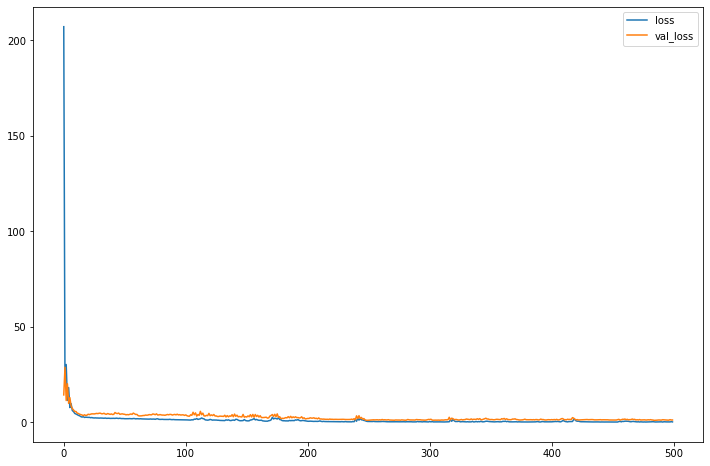

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [43]:
pred=model.predict(x_test)

2/2 [==============================] - 0s 0s/step


In [44]:
(mean_squared_error(y_test,pred))**0.5  

1.0938898272483726

In [45]:
r2_score(y_test,pred)

0.9620893943942148